In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/Shareddrives/Project 2 (Data Science)/Project 2- Team 1/data/diabetes_012_health_indicators_BRFSS2015.csv.zip')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Cleaning

In [7]:
# true/false columns
df['No Diabetes'] = df['Diabetes_012'] == 0 # no diabetes
df['Pre Diabetes'] = df['Diabetes_012'] == 1 # pre diabetes
df['Diabetes'] = df['Diabetes_012'] == 2 # diabetes

In [8]:
df.head(1)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,No Diabetes,Pre Diabetes,Diabetes
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,18.0,15.0,1.0,0.0,9.0,4.0,3.0,True,False,False


In [9]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'No Diabetes', 'Pre Diabetes', 'Diabetes'],
      dtype='object')

In [10]:
df['Diabetes_012'] = df['Diabetes_012'].astype(str)
df['Diabetes_012'] = df['Diabetes_012'].str.replace('0.0','No Diabetes')
df['Diabetes_012'] = df['Diabetes_012'].str.replace('1.0','Pre Diabetes')
df['Diabetes_012'] = df['Diabetes_012'].str.replace('2.0','Diabetes')

In [11]:
df.head(1)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,No Diabetes,Pre Diabetes,Diabetes
0,No Diabetes,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,18.0,15.0,1.0,0.0,9.0,4.0,3.0,True,False,False


In [12]:
column_counts = df.count()
print(column_counts)
# all columns have the same amount of inputs

Diabetes_012            253680
HighBP                  253680
HighChol                253680
CholCheck               253680
BMI                     253680
Smoker                  253680
Stroke                  253680
HeartDiseaseorAttack    253680
PhysActivity            253680
Fruits                  253680
Veggies                 253680
HvyAlcoholConsump       253680
AnyHealthcare           253680
NoDocbcCost             253680
GenHlth                 253680
MentHlth                253680
PhysHlth                253680
DiffWalk                253680
Sex                     253680
Age                     253680
Education               253680
Income                  253680
No Diabetes             253680
Pre Diabetes            253680
Diabetes                253680
dtype: int64


## Investigating column relationships

Investigating how each column relates to the diabetes outcome.

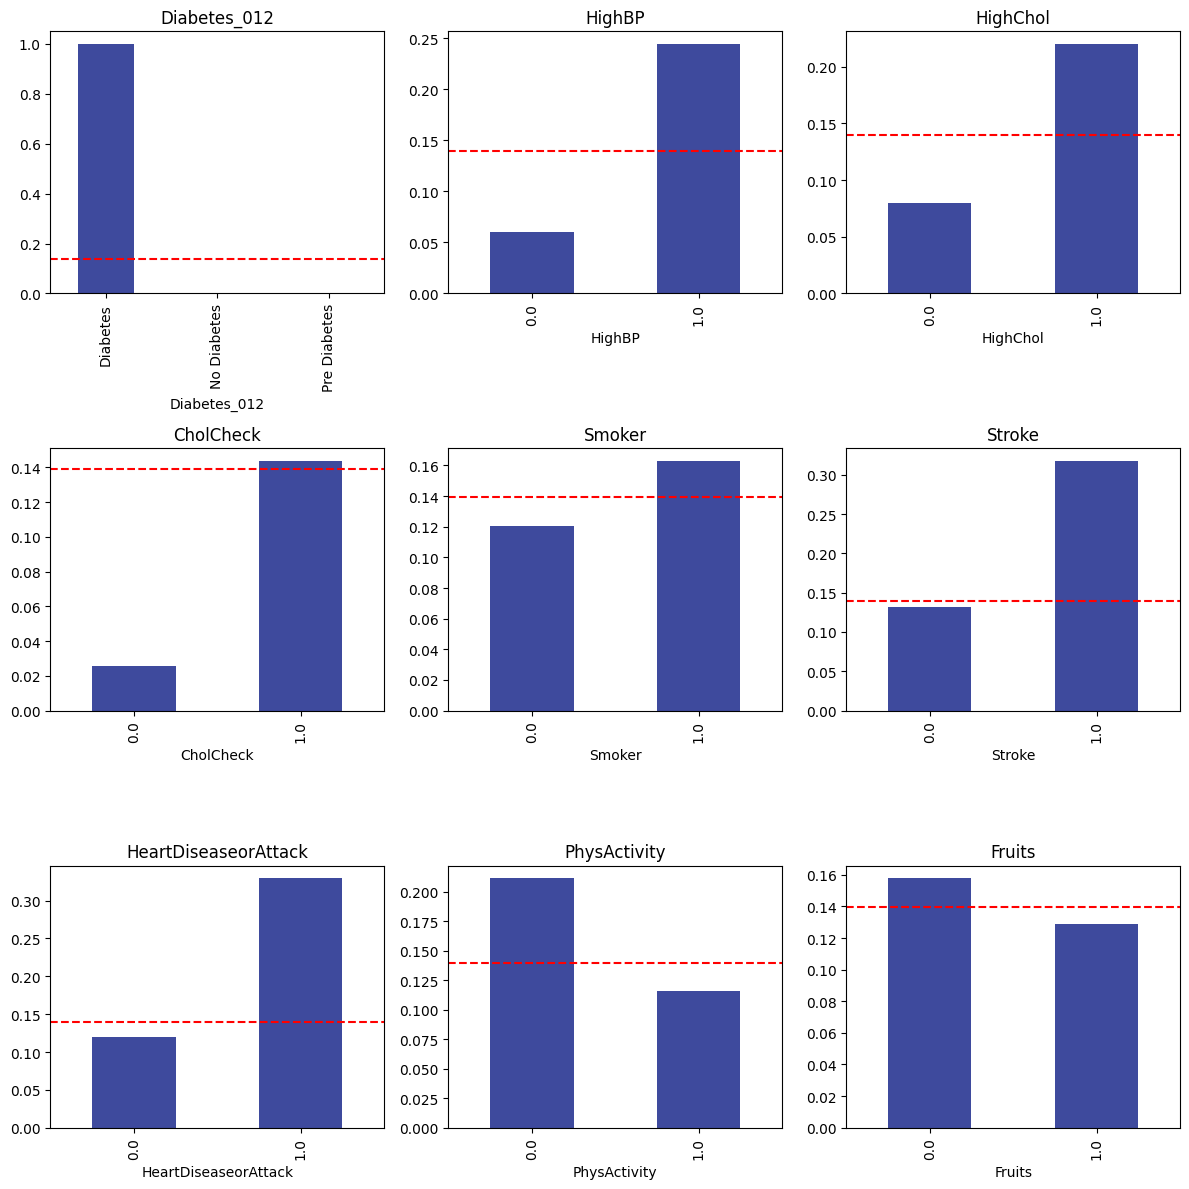

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
axs = axs.flatten()

index = 0
for col in df.columns:
    if col not in ['Pre Diabetes', 'Diabetes', 'No Diabetes', 'BMI', 'MentHlth', 'PhysHlth']:
        ax = axs[index]
        df.groupby(col)['Diabetes'].mean().plot(kind='bar', title=col, ax=ax, color = '#3e4a9d')
        ax.axhline(df['Diabetes'].mean(), color='red', linestyle='dashed')
        index += 1

        if index >= len(axs):
            break

plt.tight_layout()
plt.show()

## Basic logistic regression model

In [14]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(max_iter=10**5)

# random testing
X = df[['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'Fruits', 'HvyAlcoholConsump', 'Sex', 'Age', 'Income']]
y = df['Diabetes']

logr.fit(X, y)

preds = logr.predict(X)

df['logr_preds'] = preds

Display the results of the fit

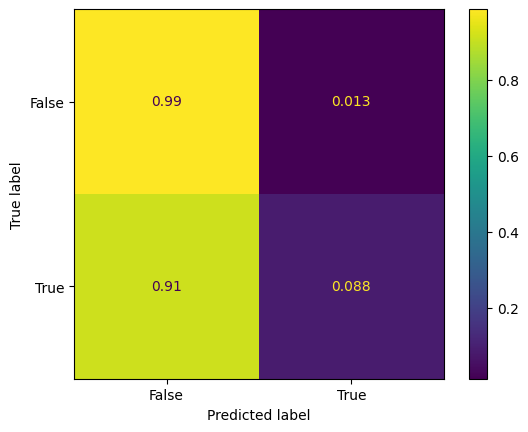

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y, y_pred=preds, normalize='true')

Balance diabetes

In [16]:
df['Diabetes'].value_counts()

,count
Diabetes,
False,218334
True,35346


In [17]:
nondiabetic_df = df[df['Diabetes'] == 0]
diabetic_df = df[df['Diabetes'] == 1]

nondiabetic_sample_df = nondiabetic_df.sample(n=len(diabetic_df))

balanced_df = pd.concat([nondiabetic_sample_df, diabetic_df])

In [18]:
balanced_df['Diabetes'].value_counts()

,count
Diabetes,
False,35346
True,35346


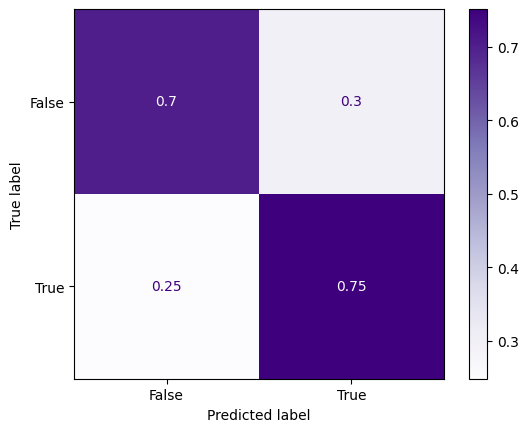

In [19]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(max_iter=10**5)

X = balanced_df[['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'Fruits', 'HvyAlcoholConsump', 'Sex', 'Age', 'Income']]
y = balanced_df['Diabetes']

logr.fit(X, y)

preds = logr.predict(X)

balanced_df['logr_preds'] = preds
ConfusionMatrixDisplay.from_predictions(y_true=y, y_pred=preds, normalize='true', cmap='Purples')

In [20]:
# Computing accuracy by hand
np.sum(y == preds) / len(y)

# Computing accuracy using a function
from sklearn.metrics import accuracy_score
accuracy_score(y, preds)

0.7261500594126634

<BarContainer object of 10 artists>

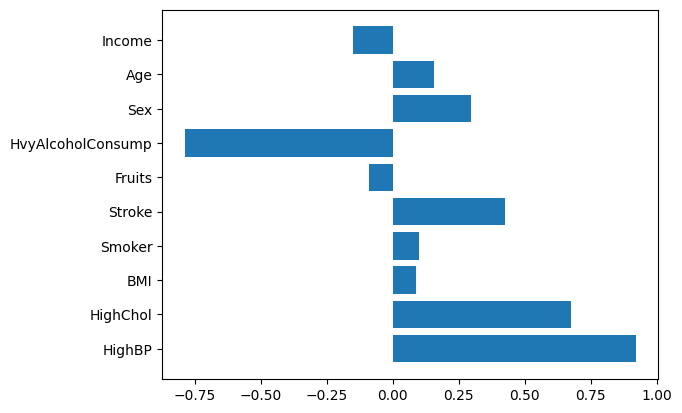

In [21]:
plt.barh(X.columns, logr.coef_[0])

In [22]:
false_positives = (y == False) & (preds == True)
balanced_df['is_false_positive'] = false_positives

In [23]:
balanced_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,DiffWalk,Sex,Age,Education,Income,No Diabetes,Pre Diabetes,Diabetes,logr_preds,is_false_positive
176245,No Diabetes,1.0,1.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,10.0,6.0,8.0,True,False,False,True,True
232290,No Diabetes,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,9.0,5.0,8.0,True,False,False,False,False
1358,No Diabetes,0.0,0.0,1.0,19.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,6.0,5.0,7.0,True,False,False,False,False
156412,No Diabetes,1.0,1.0,1.0,42.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,10.0,6.0,8.0,True,False,False,True,True
181719,No Diabetes,1.0,0.0,1.0,17.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,13.0,4.0,3.0,True,False,False,True,True


In [24]:
# People with high BP are being flagged as diabetic when they are not
balanced_df.groupby('is_false_positive')['HighBP'].mean()

,HighBP
is_false_positive,
False,0.511436
True,0.857143


In [25]:
balanced_df.groupby('is_false_positive')['HighChol'].mean()

,HighChol
is_false_positive,
False,0.495916
True,0.710693


Imagine that these false positives have both high BP and cholesterol, however they tend to have higher income. Then, we'll make a new column for the model to use which flags this.

In [26]:
balanced_df.head(1)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,DiffWalk,Sex,Age,Education,Income,No Diabetes,Pre Diabetes,Diabetes,logr_preds,is_false_positive
176245,No Diabetes,1.0,1.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,10.0,6.0,8.0,True,False,False,True,True


In [27]:
balanced_df['High readings high earner'] = (balanced_df['HighBP'] == 1) & (balanced_df['HighChol'] == 1) & (balanced_df['Income'] > 6)

In [28]:
balanced_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Sex,Age,Education,Income,No Diabetes,Pre Diabetes,Diabetes,logr_preds,is_false_positive,High readings high earner
176245,No Diabetes,1.0,1.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,...,1.0,10.0,6.0,8.0,True,False,False,True,True,True
232290,No Diabetes,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,1.0,...,0.0,9.0,5.0,8.0,True,False,False,False,False,False
1358,No Diabetes,0.0,0.0,1.0,19.0,1.0,0.0,0.0,1.0,1.0,...,0.0,6.0,5.0,7.0,True,False,False,False,False,False
156412,No Diabetes,1.0,1.0,1.0,42.0,1.0,0.0,1.0,1.0,0.0,...,1.0,10.0,6.0,8.0,True,False,False,True,True,True
181719,No Diabetes,1.0,0.0,1.0,17.0,0.0,1.0,0.0,1.0,1.0,...,0.0,13.0,4.0,3.0,True,False,False,True,True,False


In [29]:
# prompt: Find the average of how many people with No diabetes = true and high bp = 1 and high chol = 1 are in the balanced_df

# Calculate the average of people with No diabetes = True, high bp = 1, and high chol = 1
average_people = balanced_df[(balanced_df['No Diabetes'] == True) & (balanced_df['HighBP'] == 1) & (balanced_df['HighChol'] == 1)].shape[0] / balanced_df.shape[0]
print(f"The average of people with No diabetes = True, high bp = 1, and high chol = 1 is: {average_people}")


The average of people with No diabetes = True, high bp = 1, and high chol = 1 is: 0.09941719006393934


In [30]:
# prompt: make a dataframe with just the people who don't have diabetes, but have both High bp and high chol

# Create a mask for people without diabetes, with high blood pressure and high cholesterol
no_diabetes_mask = df['Diabetes_012'] == 'No Diabetes'
high_bp_mask = df['HighBP'] == 1.0
high_chol_mask = df['HighChol'] == 1.0

# Apply the masks to filter the DataFrame
filtered_df = df[no_diabetes_mask & high_bp_mask & high_chol_mask]

# Display the resulting DataFrame
filtered_df

filtered_df.head(5)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,PhysHlth,DiffWalk,Sex,Age,Education,Income,No Diabetes,Pre Diabetes,Diabetes,logr_preds
0,No Diabetes,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,15.0,1.0,0.0,9.0,4.0,3.0,True,False,False,True
2,No Diabetes,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,30.0,1.0,0.0,9.0,4.0,8.0,True,False,False,False
4,No Diabetes,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,11.0,5.0,4.0,True,False,False,False
5,No Diabetes,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,2.0,0.0,1.0,10.0,6.0,8.0,True,False,False,False
7,No Diabetes,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,11.0,4.0,4.0,True,False,False,False


In [31]:
filtered_df.drop(columns=['Diabetes_012']).groupby('NoDocbcCost').mean()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,PhysHlth,DiffWalk,Sex,Age,Education,Income,No Diabetes,Pre Diabetes,Diabetes,logr_preds
NoDocbcCost,,,,,,,,,,,,,,,,,,,,,
0.0,1.0,1.0,0.988967,28.944583,0.511197,0.068009,0.177712,0.720727,0.618965,0.794240,...,4.948956,0.219533,0.483325,9.628465,4.960617,5.907386,1.0,0.0,0.0,0.044887
1.0,1.0,1.0,0.946399,30.213579,0.588785,0.106377,0.231996,0.596756,0.521440,0.731721,...,10.821605,0.437603,0.427982,8.001649,4.566520,4.260858,1.0,0.0,0.0,0.081089


In [32]:
balanced_df['Good health reading'] = (balanced_df['HeartDiseaseorAttack'] == 0).astype(int) + (balanced_df['DiffWalk'] == 0).astype(int) + (balanced_df['Stroke'] == False).astype(int)

In [33]:
balanced_df['Bad readings, is drinker'] = (balanced_df['HighBP'] == True) & (balanced_df['HighChol'] == True) & (balanced_df['HvyAlcoholConsump'] == True)

In [34]:
balanced_df['Healthcare'] = (balanced_df['AnyHealthcare'] == 1) & (balanced_df['NoDocbcCost'] == 0)

In [35]:
balanced_df['High readings'] = (balanced_df['HighBP'] == 1) & (balanced_df['HighChol']== 1)

In [36]:
balanced_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,No Diabetes,Pre Diabetes,Diabetes,logr_preds,is_false_positive,High readings high earner,Good health reading,"Bad readings, is drinker",Healthcare,High readings
176245,No Diabetes,1.0,1.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,...,True,False,False,True,True,True,2,False,True,True
232290,No Diabetes,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,1.0,...,True,False,False,False,False,False,3,False,True,False
1358,No Diabetes,0.0,0.0,1.0,19.0,1.0,0.0,0.0,1.0,1.0,...,True,False,False,False,False,False,3,False,True,False
156412,No Diabetes,1.0,1.0,1.0,42.0,1.0,0.0,1.0,1.0,0.0,...,True,False,False,True,True,True,2,False,True,True
181719,No Diabetes,1.0,0.0,1.0,17.0,0.0,1.0,0.0,1.0,1.0,...,True,False,False,True,True,False,2,False,True,False


0.7431816895829797

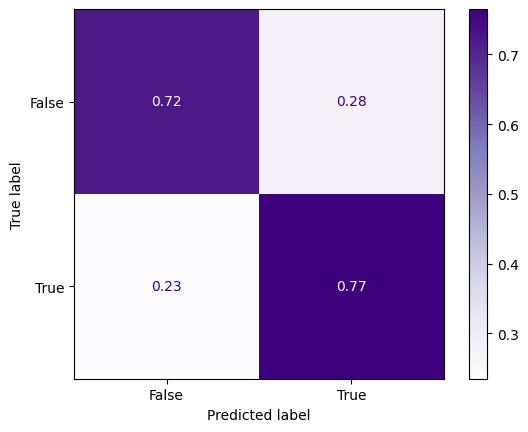

In [37]:
#Smoker 'Fruits', 'Veggies',
X = balanced_df[['HighBP', 'HighChol', 'BMI', 'PhysActivity','Stroke',
                 'AnyHealthcare', 'NoDocbcCost', 'GenHlth','MentHlth', 'PhysHlth', 'DiffWalk',
                 'Sex', 'Age', 'Education', 'Income', 'Good health reading', 'Healthcare',
                 'High readings']]
y = balanced_df['Diabetes']

logr.fit(X, y)

preds = logr.predict(X)

balanced_df['logr_preds'] = preds

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y, y_pred=preds, normalize='true', cmap = 'Purples')

accuracy_score(y, preds)

<BarContainer object of 18 artists>

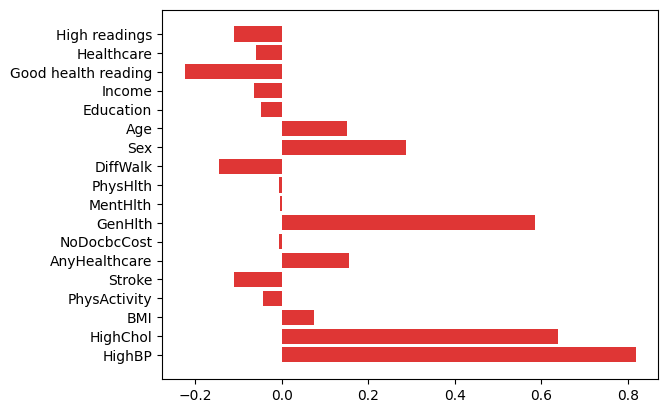

In [38]:
plt.barh(X.columns, logr.coef_[0], color = '#df3635')

In [39]:
y.unique()

array([False,  True])

In [40]:
diabetic_prob_preds = logr.predict_proba(X)[:, 1]

balanced_df['logr_preds_proba'] = diabetic_prob_preds

In [41]:
balanced_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Pre Diabetes,Diabetes,logr_preds,is_false_positive,High readings high earner,Good health reading,"Bad readings, is drinker",Healthcare,High readings,logr_preds_proba
176245,No Diabetes,1.0,1.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,...,False,False,True,True,True,2,False,True,True,0.546244
232290,No Diabetes,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,1.0,...,False,False,False,False,False,3,False,True,False,0.055008
1358,No Diabetes,0.0,0.0,1.0,19.0,1.0,0.0,0.0,1.0,1.0,...,False,False,False,False,False,3,False,True,False,0.034229
156412,No Diabetes,1.0,1.0,1.0,42.0,1.0,0.0,1.0,1.0,0.0,...,False,False,True,True,True,2,False,True,True,0.912388
181719,No Diabetes,1.0,0.0,1.0,17.0,0.0,1.0,0.0,1.0,1.0,...,False,False,True,True,False,2,False,True,False,0.501085


In [42]:
balanced_df['logr_preds_proba_color'] = None
balanced_df.loc[balanced_df['Diabetes'] == True, 'logr_preds_proba_color'] = 'red'
balanced_df.loc[balanced_df['Diabetes'] == False, 'logr_preds_proba_color'] = 'blue'

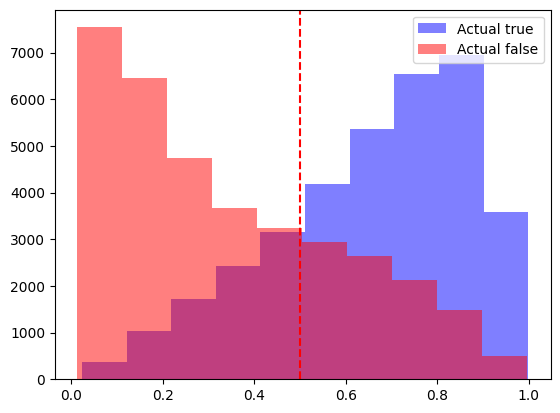

In [43]:
plt.hist(balanced_df[balanced_df['Diabetes'] == True]['logr_preds_proba'], color='blue', label='Actual true', alpha=0.5)
plt.hist(balanced_df[balanced_df['Diabetes'] == False]['logr_preds_proba'], color='red', label='Actual false', alpha=0.5)
plt.axvline(0.5, color='red', linestyle='dashed')
plt.legend()

In [44]:
balanced_df['is_false_positive'] = (balanced_df['logr_preds'] != balanced_df['Diabetes']) & (balanced_df['Diabetes'] == False)

balanced_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Diabetes,logr_preds,is_false_positive,High readings high earner,Good health reading,"Bad readings, is drinker",Healthcare,High readings,logr_preds_proba,logr_preds_proba_color
176245,No Diabetes,1.0,1.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,...,False,True,True,True,2,False,True,True,0.546244,blue
232290,No Diabetes,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,1.0,...,False,False,False,False,3,False,True,False,0.055008,blue
1358,No Diabetes,0.0,0.0,1.0,19.0,1.0,0.0,0.0,1.0,1.0,...,False,False,False,False,3,False,True,False,0.034229,blue
156412,No Diabetes,1.0,1.0,1.0,42.0,1.0,0.0,1.0,1.0,0.0,...,False,True,True,True,2,False,True,True,0.912388,blue
181719,No Diabetes,1.0,0.0,1.0,17.0,0.0,1.0,0.0,1.0,1.0,...,False,True,True,False,2,False,True,False,0.501085,blue


In [45]:
# Stack together false positives (no diabetes, but prediction of diabetes) with people with diabetes
diabetic_balanced_df = balanced_df[balanced_df['Diabetes'] == True]
diabetic_balanced_df['diabetic_indic'] = True
false_positives_df = balanced_df[balanced_df['is_false_positive'] == True]
false_positives_df['diabetic_indic'] = False

# Stack both together
diabetic_fp_stacked_df = pd.concat([diabetic_balanced_df, false_positives_df])

<ipython-input-45-928e0b9e3451>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetic_balanced_df['diabetic_indic'] = True
<ipython-input-45-928e0b9e3451>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  false_positives_df['diabetic_indic'] = False


In [46]:
import numpy as np

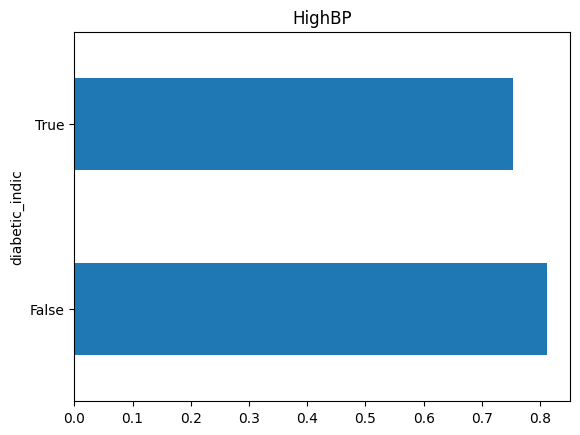

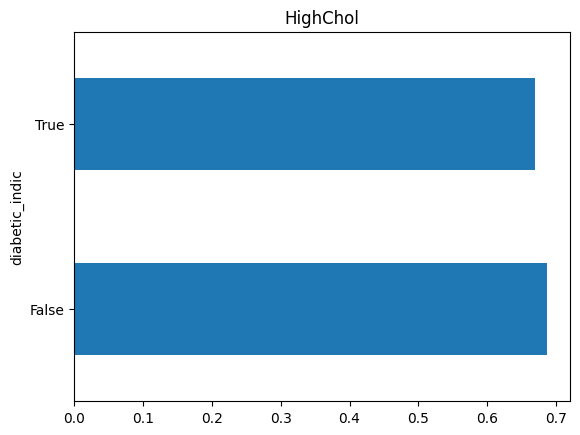

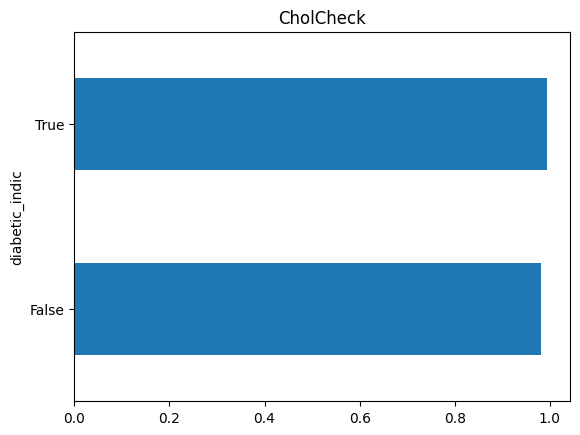

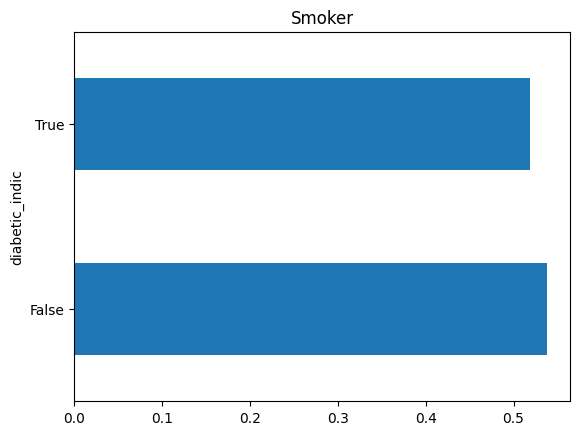

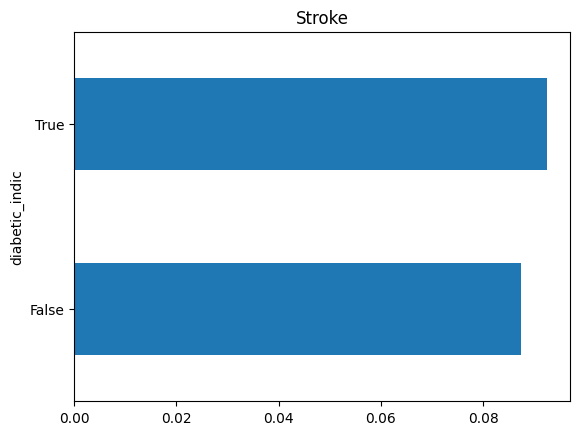

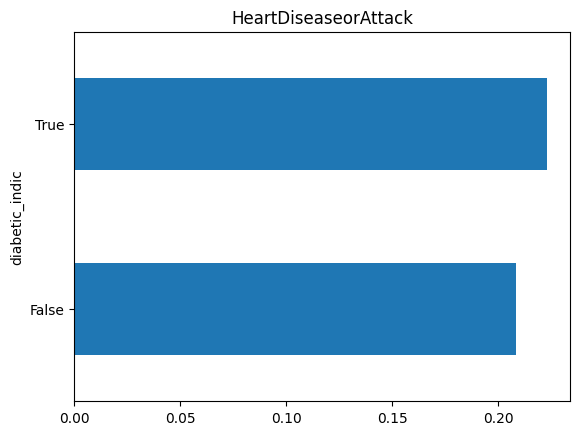

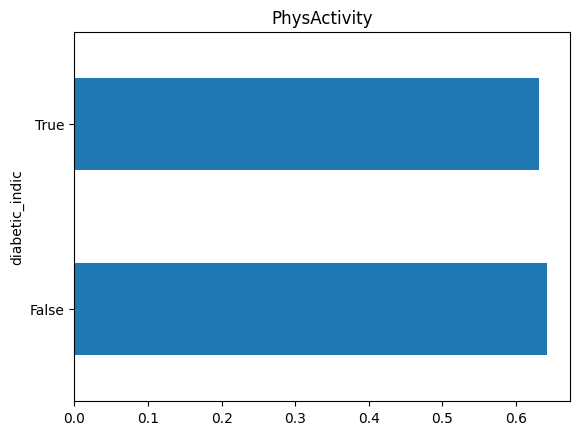

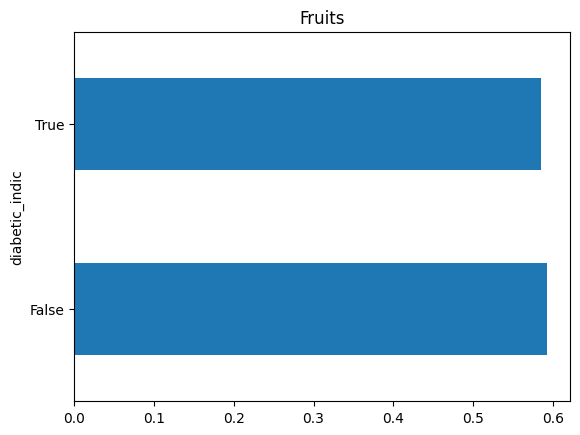

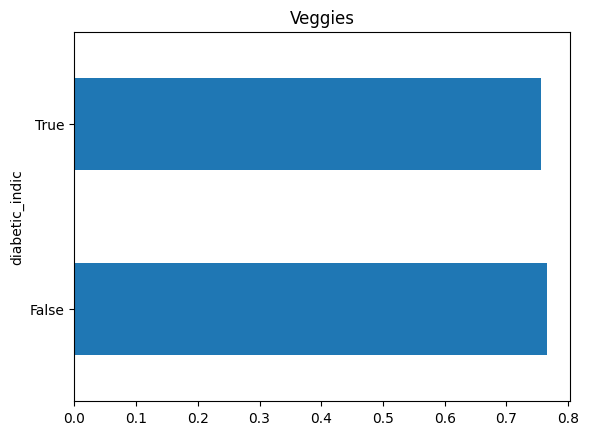

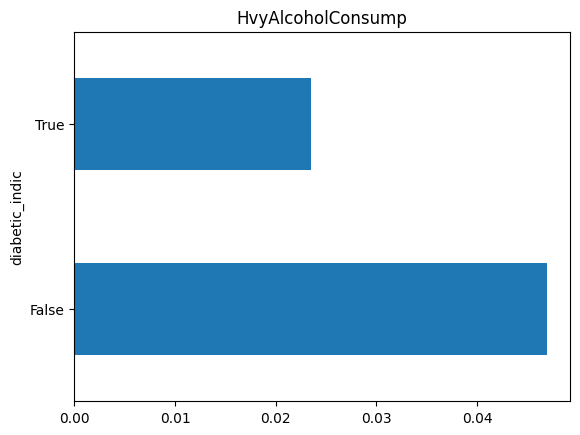

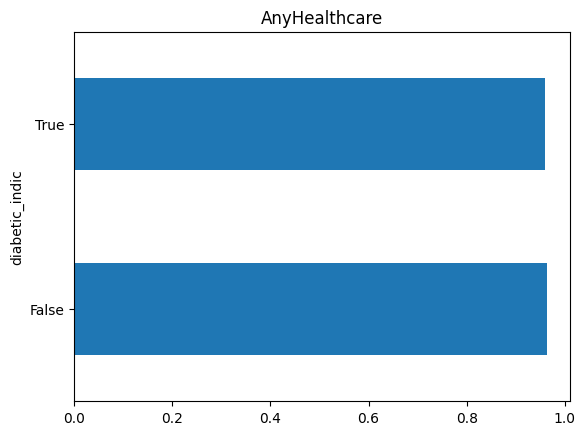

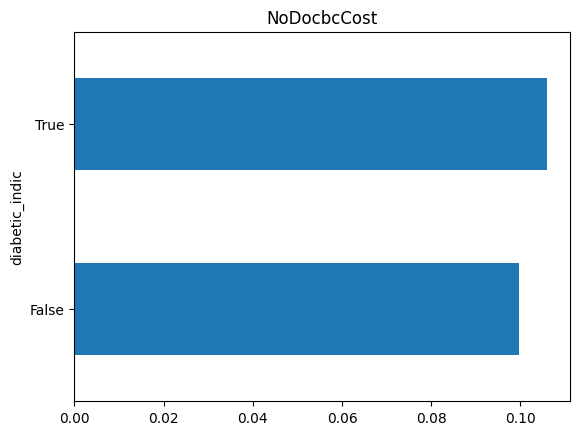

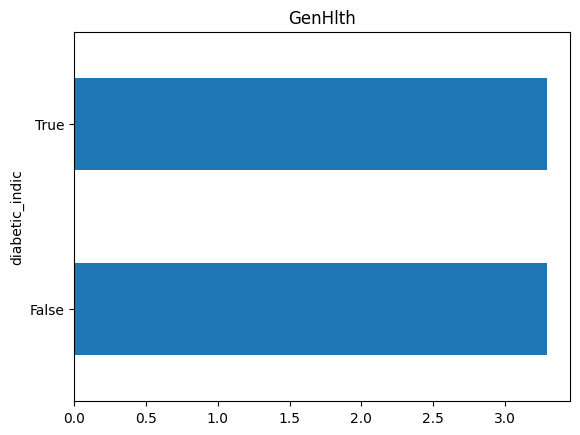

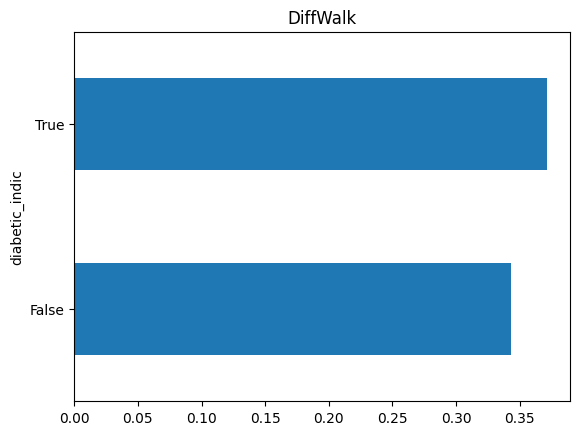

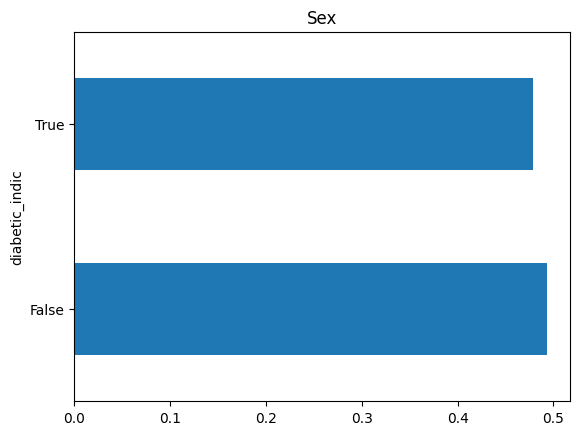

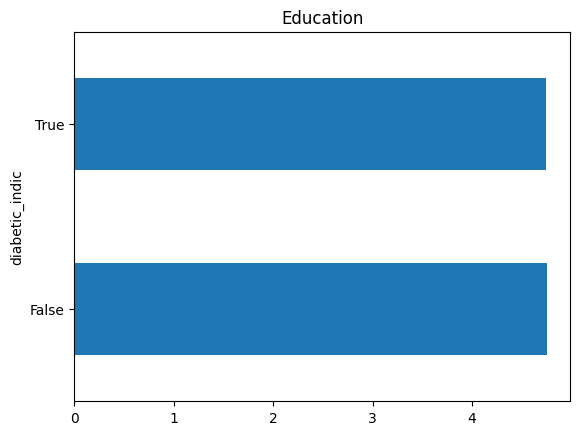

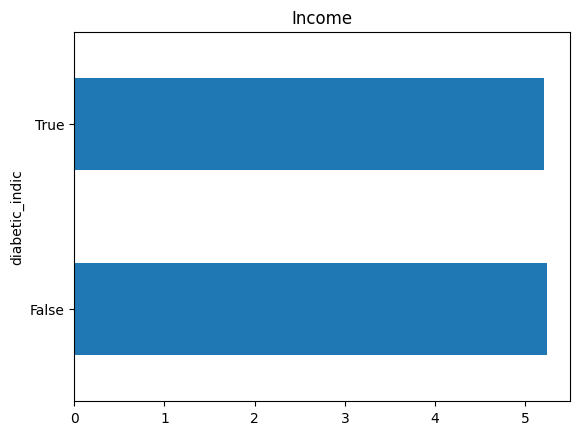

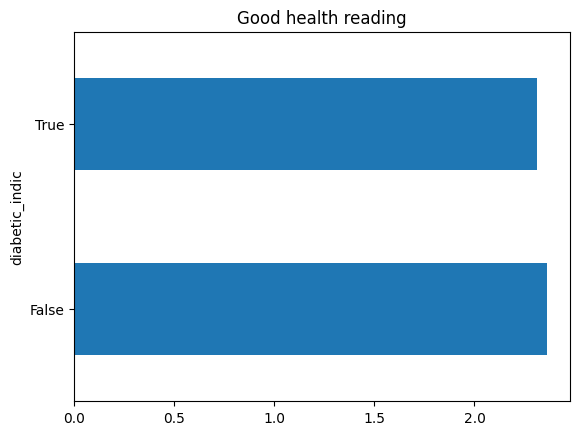

In [47]:
for col in diabetic_fp_stacked_df.select_dtypes(np.number).columns:
  if diabetic_fp_stacked_df[col].nunique() < 10:
    diabetic_fp_stacked_df.groupby('diabetic_indic')[col].mean().plot(kind='barh', title=col)
    plt.show()

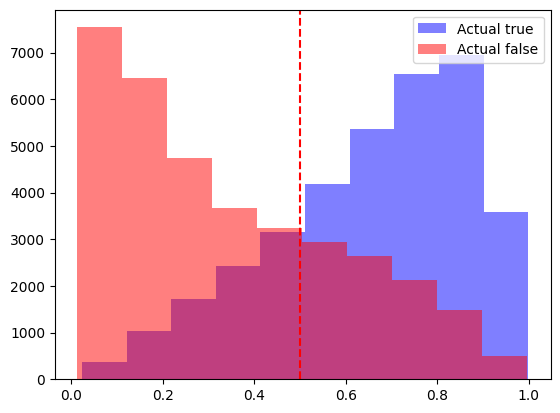

In [48]:
plt.hist(balanced_df[balanced_df['Diabetes'] == True]['logr_preds_proba'], color='blue', label='Actual true', alpha=0.5)
plt.hist(balanced_df[balanced_df['Diabetes'] == False]['logr_preds_proba'], color='red', label='Actual false', alpha=0.5)
plt.axvline(0.5, color='red', linestyle='dashed')
plt.legend()